#  Findings + Technical Report

1. __Problem introduction.__ Determinating the meaning and importance for this problem.
2. __Univariable study.__ The dependent variable ('Outcomes Type') under focus.
3. __Multivariate study.__ The dependent variable and independent variables relation under focus.
4. __Cleaning.__ Cleaning the dataset and handle the missing datas, outliers and categorical variables.
5. __Test assumptions and EDA.__ Cheking if the data meets the assumptions required by most multivariate techniques.
5. __Modelling.__ 

### Problem introduction

Predicting the trends in animal outcomes.

Helping to shelters understand the trends in animal outcomes, so they can focus on those animals who need more help.

### Univariable study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

#### Base dataset

In [2]:
df_readin = pd.read_csv('./Animal_Shelter_Intake_and_Outcome_Sohoma_country.csv')
df_readin.head(5)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,NaN,CAT,DOMESTIC SH,BLACK,Male,KITTN,NaN,K17-026134,FREEZER,A363799,...,FIELD,EUTHANIZE,INJ SEVERE,UNTREATABLE,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
1,SUGAR,DOG,LABRADOR RETR,YELLOW,Neutered,LARGE,09/24/2008,K17-022441,DS75,A228255,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,COUNTY,COUNTY,95404.0,"95404(38.458384, -122.675588)",1
2,MIMS,CAT,DOMESTIC SH,CALICO,Spayed,KITTN,10/13/2017,K17-026771,LOBBY,A366380,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95401.0,"95401(38.446019, -122.766748)",1
3,*MILLIE,DOG,CHIHUAHUA SH,BLUE/TAN,Spayed,TOY,03/29/2009,K17-022804,DA05,A349551,...,OVER THE COUNTER,ADOPTION,SCAS WEB,TREATABLE/REHAB,HEALTHY,SANTA ROSA,OUT OF COUNTY,94591.0,"94591(38.107585, -122.209634)",1
4,SAM,DOG,LABRADOR RETR,YELLOW,Male,LARGE,11/01/2007,K14-007704,DS66,A211734,...,FIELD,RETURN TO OWNER,RETURN TO OWNER,HEALTHY,HEALTHY,SANTA ROSA,*CLOVERDALE,95425.0,"95425(38.790859, -123.010876)",1


As there are seven different types of outcomes variable, the problem is a multiclass classification problem. Besides getting to know the probability for each of the classes my aim is also to aqknowledge the feature importances.

### Multivariate study

In [3]:
df_readin.Breed.value_counts().iloc[0:5]

DOMESTIC SH     4401
PIT BULL        1250
CHIHUAHUA SH     783
DOMESTIC MH      521
PIT BULL/MIX     512
Name: Breed, dtype: int64

Most animals are without names, to solve this and use it as a feature I will recreate it,  as eighter there's a given name or not. 

The Breed variable has too many different values, needs to be reduced. We can also look at it by contrasting mixes with non-mixes. 

I'm going to leave the 'Date of birth' function so I can calculate the age at the different outcomes. The 'Impound Number's and the 'Animal ID's are all idetical and I also won't make much use of the 'Kennel number', so I will leave them out. As well as leaving out the 'Count' variable. 

There is four variable for location, for now I'm keeping all of it, as they are, but later I'm going to reduce the number of this type of variables. The rest of the features all seem to be interesting predictors.

See below the table of features with decriptions.
 

In [4]:
df = df_readin.drop(axis=0, columns=['Impound Number', 'Animal ID', 'Kennel Number', 'Count'])
df.head(3)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location
0,NaN,CAT,DOMESTIC SH,BLACK,Male,KITTN,NaN,11/01/2017,11/01/2017,0,STRAY,FIELD,EUTHANIZE,INJ SEVERE,UNTREATABLE,UNTREATABLE,COUNTY,NaN,NaN,NaN
1,SUGAR,DOG,LABRADOR RETR,YELLOW,Neutered,LARGE,09/24/2008,02/03/2017,02/04/2017,1,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,COUNTY,COUNTY,95404.0,"95404(38.458384, -122.675588)"
2,MIMS,CAT,DOMESTIC SH,CALICO,Spayed,KITTN,10/13/2017,12/22/2017,01/17/2018,26,STRAY,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95401.0,"95401(38.446019, -122.766748)"


In [5]:
print('List of remaining variables:')


data_list = [['Name', 'Name of the dogs. Used wheather is given or not.', df.Name.dtype], 
    ['Type', 'The different types of animals in 3 cathegory.', df.Type.dtype],
    ['Breed', ' Breeds of the animals.', df.Breed.dtype],
    ['Color', 'Color of the given animals.', df.Color.dtype],
    ['Sex','Sex of the given animals, with four values: M, F, Neutered, Spayed.', df.Sex.dtype],
    ['Size','Size of the given animals by the different types of animals.', df.Size.dtype],
    ['Date Of Birth','Color of the given animals. For later calculation.', df['Date Of Birth'].dtype],
    ['Intake Date','Date of the intake. For later calculation.',df['Intake Date'].dtype],
    ['Outcome Date','Date of the outcome. For later calculation.', df['Outcome Date'].dtype],
    ['Intake Type','Type of the intake of the given animals with seven values.', df['Intake Type'].dtype],
    ['Days in Shelter','Days spent in Shelter.', df['Days in Shelter'].dtype],
    ['Intake Subtype','The way, the given animals were captured.', df['Intake Subtype'].dtype],
    ['Outcome Type','Type of the outcome of the given animals, the dependent variable.',df['Outcome Type'].dtype],
    ['Outcome Subtype','Subtype of the outcome of the given animals.', df['Outcome Subtype'].dtype],
    ['Intake Condition','Condition of the given animals after the intake.', df['Intake Condition'].dtype],
    ['Outcome Condition','Condition of the given animals after the outcome.', df['Outcome Condition'].dtype],
    ['Intake Jurisdiction','Location before the intake the outcome of the given animals.',df['Intake Jurisdiction'].dtype],
    ['Outcome Jurisdiction','Location after the outcome of the given animals.', df['Outcome Jurisdiction'].dtype],
    ['Outcome Zip Code','Location after the outcome of the given animals.', df['Outcome Zip Code'].dtype],
    ['Location','Location after the outcome of the given animals.', df['Location'].dtype],
    ['dataset_shape',df.shape]]


df_features = pd.DataFrame(data_list, columns=['Features','Description', 'Data type'])
df_features
#pprint(data_dict)

List of remaining variables:


,Features,Description,Data type
0,Name,Name of the dogs. Used wheather is given or not.,object
1,Type,The different types of animals in 3 cathegory.,object
2,Breed,Breeds of the animals.,object
3,Color,Color of the given animals.,object
4,Sex,"Sex of the given animals, with four values: M,...",object
5,Size,Size of the given animals by the different typ...,object
6,Date Of Birth,Color of the given animals. For later calculat...,object
7,Intake Date,Date of the intake. For later calculation.,object
8,Outcome Date,Date of the outcome. For later calculation.,object
9,Intake Type,Type of the intake of the given animals with s...,object


### Cleaning

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

The selected dataframe has 20 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Name,4013,25.3
Date Of Birth,3664,23.1
Outcome Zip Code,2369,15.0
Location,2369,15.0
Outcome Jurisdiction,2312,14.6
Outcome Subtype,218,1.4
Outcome Condition,193,1.2
Outcome Date,122,0.8
Outcome Type,122,0.8
Size,27,0.2


In [8]:
df = df.dropna(subset=['Outcome Type', 'Size'])

In [9]:
def to_wheather_name(row):
    if pd.isna(row['Name']):
        return 'name not given'
    else:
        return 'name given'


df['Name_given'] = df.apply(to_wheather_name, axis=1)

In [10]:
df = df.drop(axis=0, columns='Name')

In [11]:
missing_values_table(df)

The selected dataframe has 20 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Date Of Birth,3621,23.1
Outcome Zip Code,2275,14.5
Location,2275,14.5
Outcome Jurisdiction,2218,14.1
Outcome Subtype,96,0.6
Outcome Condition,71,0.5


_Too many missing values in location types, not that important feature to drop rows for it_

In [12]:
df = df.drop(['Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location'], axis=1).dropna()

In [13]:
dob = pd.to_datetime(df['Date Of Birth'], format='%m/%d/%Y')
#dob.hist()

In [14]:
df = df.dropna(subset=['Date Of Birth'])

In [15]:
missing_values_table(df)

The selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Test assumptions and EDA

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime 
from datetime import timedelta

__Shelter animal types__

First look at the distribution the differend kind of animals. The number of the dogs in the dataset highly outweights the number of other animals.

Text(0.5,1,'Shelter animal types')

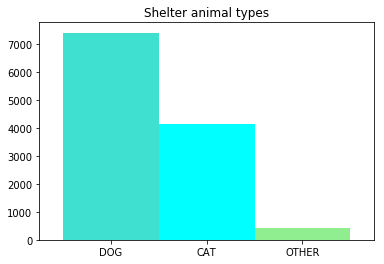

In [17]:
AnimalType = df['Type'].value_counts() 
AnimalType.plot(kind='bar',rot=0, width=1, color=['turquoise', 'aqua','lightgreen'])
plt.title('Shelter animal types')

 __Outcome types__

Then examine the distrubution of the outcome types. Furtunately the number of adoptions and the return to owner features are far the highest opposed to the other outcomes types, like euthanize or death.

Text(0.5,1,'Outcome types')

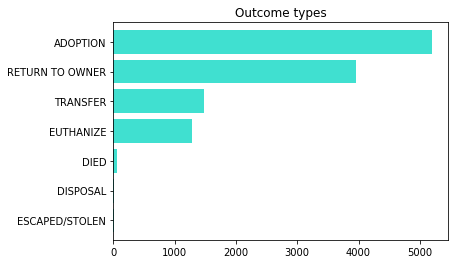

In [18]:
AnimalType = df['Outcome Type'].value_counts().sort_values() 
AnimalType.plot(kind='barh',width=0.8,rot=0, color='turquoise')
plt.title('Outcome types')

In [19]:
df = df[df['Outcome Type'] != 'ESCAPED/STOLEN']
df = df[df['Outcome Type'] != 'DISPOSAL']

__Outcomes distribution of different animals__

Text(0.5,1,'Outcomes distribution of different animals')

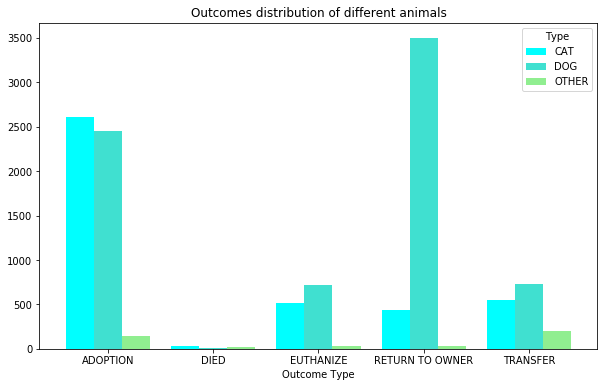

In [20]:
AnimalType = df[['Type','Outcome Type']].groupby(['Outcome Type','Type']).size().unstack()
AnimalType.plot(kind='bar',width=0.8,rot=0, figsize=(10, 6), color=['aqua','turquoise','lightgreen'])
plt.title('Outcomes distribution of different animals')

In [21]:
AnimalType = df[['Outcome Type', 'Type']].groupby(['Type', 'Outcome Type']).size().unstack()

In [22]:
AnimalType
t_total = pd.DataFrame(df['Name_given'].value_counts())
t_total
t_percent = AnimalType.join(t_total, how='outer')

In [23]:
#n_percent.reset_index(level=0, inplace=True)
t_percent.columns = ['type', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER']

In [24]:
t_percent.columns
AnimalType.sum()
t_total = pd.DataFrame(df['Type'].value_counts())
t_percent = AnimalType.join(t_total, how='outer')

In [25]:
dog = t_percent.iloc[:1,:6].div(4141)
cat = t_percent.iloc[1:2,:6].div(7412)
other = t_percent.iloc[2:3,:6].div(429)

In [26]:
t_frames = [dog, cat, other]
t_percentages = pd.concat(t_frames, axis=0)
t_percentages

,ADOPTION,DIED,EUTHANIZE,RETURN TO OWNER,TRANSFER,Type
CAT,0.629800,0.007969,0.125091,0.105289,0.131852,1.0
DOG,0.330005,0.001889,0.097545,0.471668,0.098894,1.0
OTHER,0.344988,0.048951,0.081585,0.062937,0.461538,1.0


In [27]:
t_percentages = t_percentages.drop(axis=0, columns=['Type'])

Text(0.5,1,'Outcomes distribution by name')

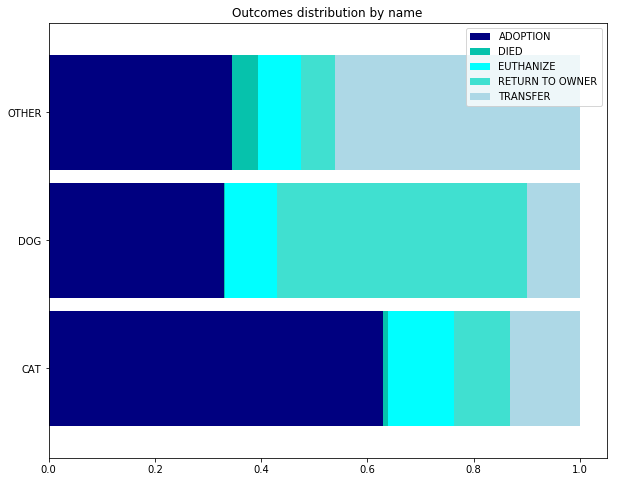

In [28]:
t_percentages.plot(kind='barh', stacked=True,  width=0.9,rot=0,color=['navy','xkcd:turquoise','aqua','turquoise', 'lightblue'], figsize=(10, 8))
plt.title('Outcomes distribution by name')

All animal types are adopted at a high rate, but cats seem to have a higher chance. Dogs are much more likely to be returned to their owners than cats. It also appears that catss are more likely to have died compared to dogs.

__Gender distribution__

Text(0.5,1,'Gender distribution')

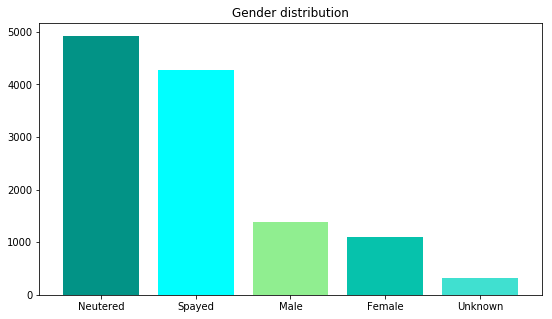

In [29]:
df.Sex.value_counts().plot(kind='bar',width=0.8,rot=0, figsize=(9, 5), color=['xkcd:teal','aqua','lightgreen', 'xkcd:turquoise','turquoise', 'azure']);
plt.title("Gender distribution")

As we can see the number of neutered and spayed animals is a lot higher.

_We need to get rid of the 'Unknown' category_
_No use of keeping it, if any influence it has on the model performance, we wouldn't be able to define the meaning of it_

In [30]:
df = df[df['Sex'] != 'Unknown']
df['Sex'].value_counts()

Neutered    4921
Spayed      4271
Male        1380
Female      1093
Name: Sex, dtype: int64

In [31]:
animal_gender = df[['Outcome Type', 'Sex']].groupby(['Sex', 'Outcome Type']).size().unstack()

In [32]:
sex_total = pd.DataFrame(df.Sex.value_counts())
sex_percent = animal_gender.join(sex_total, how='outer')
sex_percent.reset_index(level=0, inplace=True)
sex_percent.columns = ['Animal', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER',
       'Total']
sex_percent.columns

Index(['Animal', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER',
       'TRANSFER', 'Total'],
      dtype='object')

In [33]:
sex_total = pd.DataFrame(df.Sex.value_counts())
sex_percent = animal_gender.join(sex_total, how='outer')
sex_percent

,ADOPTION,DIED,EUTHANIZE,RETURN TO OWNER,TRANSFER,Sex
Female,23,19,310,487,254,1093
Male,27,17,301,756,279,1380
Neutered,2652,13,341,1494,421,4921
Spayed,2491,2,226,1216,336,4271


In [34]:
female = sex_percent.iloc[:1,:6].div(1093)
male = sex_percent.iloc[1:2,:6].div(1380)
neutered = sex_percent.iloc[2:3,:6].div(4921)
spayed = sex_percent.iloc[3:4,:6].div(4271)

In [35]:
sex_frames = [female, male, neutered, spayed]
sex_percentages = pd.concat(sex_frames, axis=0)
sex_percentages
sex_percentages = sex_percentages.drop(axis=0, columns=['Sex'])

Text(0.5,1,'Outcomes distribution by sexes')

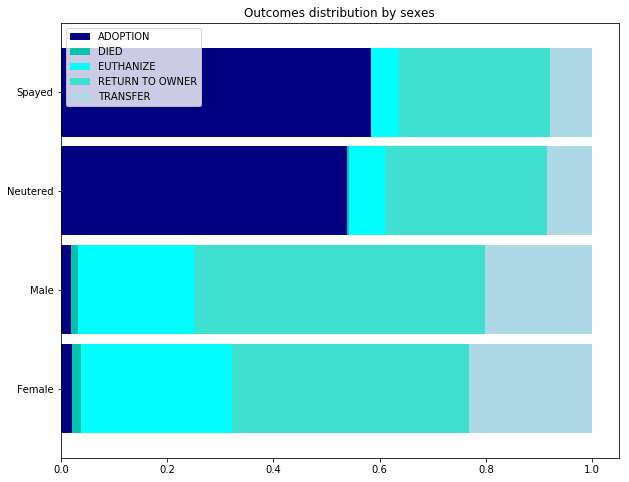

In [36]:
sex_percentages.plot(kind='barh', stacked=True,  width=0.9,rot=0,color=['navy', 'xkcd:turquoise','aqua','turquoise', 'lightblue'], figsize=(10, 8))
plt.title('Outcomes distribution by sexes')

In case of the neutered animals the chances seem higher for adoption, so that can be an important feature.

__Distribution of breeds__

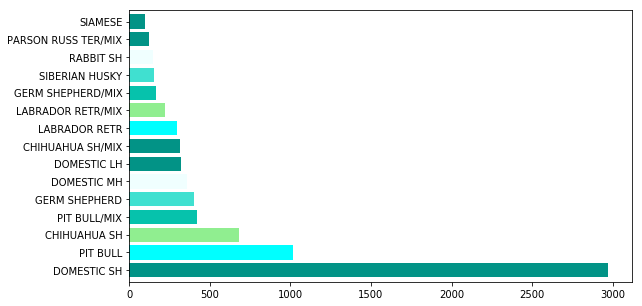

In [37]:
df['Breed'].value_counts().head(15).plot(kind='barh',width=0.8,rot=0, figsize=(9, 5), color=['xkcd:teal','aqua','lightgreen', 'xkcd:turquoise','turquoise', 'azure'])

_Simplifying breeds_

In [38]:
df['Breed'].nunique()

749

In [39]:
common_breeds = df['Breed'].value_counts().head(150)

In [40]:
def to_common_breeds(row):
    if row['Breed'] in common_breeds:
        return row['Breed']
    else:
        return 'uncommon bred'


df['Breeds'] = df.apply(to_common_breeds, axis=1)
df.filter(items=['Breed', 'Breeds']).head(5)

,Breed,Breeds
1,LABRADOR RETR,LABRADOR RETR
2,DOMESTIC SH,DOMESTIC SH
3,CHIHUAHUA SH,CHIHUAHUA SH
4,LABRADOR RETR,LABRADOR RETR
5,AUST CATTLE DOG/MIX,AUST CATTLE DOG/MIX


In [41]:
df['Breeds'].nunique()

151

In [42]:
def color_simplifier(row):
    if "/" in row['Breeds']:
        return row['Breeds'].split('/')[0] + ' mixed breed'
        return 'mixed breed'
    else:
        return row['Breeds']


df['Breed type'] = df.apply(color_simplifier, axis=1)
df.filter(items=['Breeds', 'Breed type']).head(2)

,Breeds,Breed type
1,LABRADOR RETR,LABRADOR RETR
2,DOMESTIC SH,DOMESTIC SH


In [43]:
df['Breed type'].nunique()

124

In [44]:
df_dogs = df.loc[df.Type=='DOG'].copy()

(-0.5, 1199.5, 999.5, -0.5)

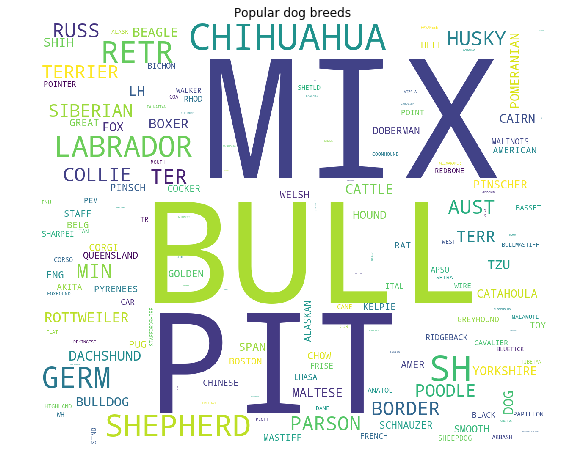

In [45]:
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize = (20, 18))
plt.subplot(2, 2, 1)

text_dog = ' '.join(df_dogs['Breed'].fillna('').values)

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Popular dog breeds')
plt.axis("off")

In [46]:
def to_wheather_mix(row):
    if "/" in row['Breed']:
        return 'mixed breed dog'
    else:
        return 'pure-bred'


df_dogs['Dog breed types'] = df_dogs.apply(to_wheather_mix, axis=1)
df_dogs.filter(items=['Breed', 'Dog breed types']).head(2)

,Breed,Dog breed types
1,LABRADOR RETR,pure-bred
3,CHIHUAHUA SH,pure-bred


Suprisingly the rate of adoption is higher in case of the mixed breed dogs. Pure-bred are dogs more likely to be returned to their owners.

__Distribution of colors__

In [47]:
df.Color.nunique()

249

In [48]:
def color_simplifier(row):
    if "/" in row['Color']:
        return row['Color'].split('/')[0] + ' mixed color'
        return 'mixed color'
    else:
        return row['Color']


df['Simple color'] = df.apply(color_simplifier, axis=1)
df.filter(items=['Color', 'Simple color']).head(3)

,Color,Simple color
1,YELLOW,YELLOW
2,CALICO,CALICO
3,BLUE/TAN,BLUE mixed color


In [49]:
df['Simple color'].nunique()

97

__Without names__

In [50]:
animal_name = df[['Outcome Type', 'Name_given']].groupby(['Name_given', 'Outcome Type']).size().unstack()

In [51]:
n_total = pd.DataFrame(df['Name_given'].value_counts())
n_percent = animal_name.join(n_total, how='outer')
n_percent.columns = ['name', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER']

In [52]:
n_total = pd.DataFrame(df['Name_given'].value_counts())
n_percent = animal_name.join(n_total, how='outer')

In [53]:
name_given = n_percent.iloc[:1,:6].div(10458)
name_not_given = n_percent.iloc[1:2,:6].div(1207)

Text(0.5,1,'Outcomes distribution by name')

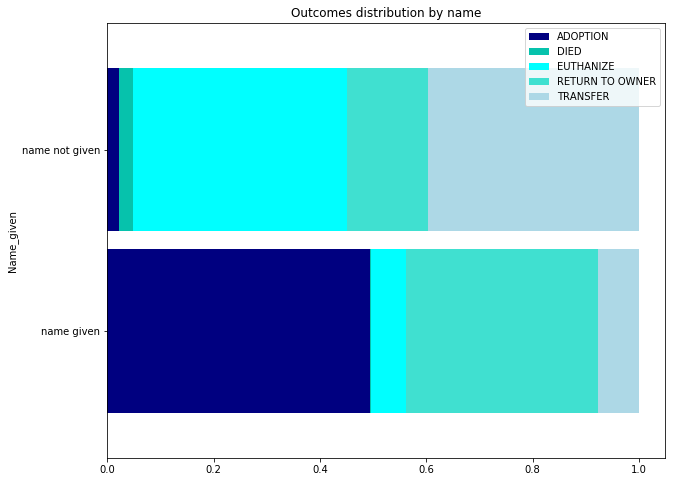

In [54]:
n_frames = [name_given, name_not_given]
n_percentages = pd.concat(n_frames, axis=0)
n_percentages = n_percentages.drop(axis=0, columns=['Name_given'])
n_percentages.plot(kind='barh', stacked=True,  width=0.9,rot=0,color=['navy','xkcd:turquoise','aqua','turquoise', 'lightblue'], figsize=(10, 8))
plt.title('Outcomes distribution by name')

The rate of adopted animals is very low when they do not have a name, while high rate of euthanize and transfer can be shown in their case.

__Time spent in shelter__

In [55]:
shelter_days = df['Days in Shelter']

def counting(shelter_days):
    in_one_day = 0
    in_one_week = 0
    in_one_month = 0
    in_three_month = 0
    more_than_three_month = 0 
    more_than_half_year = 0
    more_than_a_year = 0
    for days in shelter_days:
        if days < 2:
            in_one_day += 1
        elif days < 8:
            in_one_week += 1
        elif days < 30:
            in_one_month += 1
        elif days < 90:
            in_three_month += 1
        elif days < 180:
            more_than_three_month += 1
        elif days < 365:
            more_than_half_year += 1
        elif days > 365:
            more_than_a_year += 1
    shelter_periods = {'In one day':in_one_day, 'In one week':in_one_week, 'In one month':in_one_month, 
                       'In three month':in_three_month, 'More than three month':more_than_three_month, 
                       'More than half year':more_than_half_year, 'More than one year': more_than_a_year}
    return shelter_periods

shelter_periods = counting(shelter_days)

In [56]:
def to_periods(row):
    if row['Days in Shelter'] < 2:
        return 'in one day'
    elif row['Days in Shelter'] < 8:
        return 'in one week'
    elif row['Days in Shelter'] < 30:
        return 'in one month'
    elif row['Days in Shelter'] < 90:
        return 'in three month'
    elif row['Days in Shelter'] < 180:
        return 'more_than_three_month'
    elif row['Days in Shelter'] < 365:
        return 'more_than_half_year'
    elif row['Days in Shelter'] > 365:
        return 'more_than_a_year'


df['Periods in shelter'] = df.apply(to_periods, axis=1)
df['Periods in shelter'].unique()

array(['in one day', 'in one month', 'in three month',
       'more_than_half_year', 'in one week', 'more_than_three_month',
       'more_than_a_year'], dtype=object)

In [57]:
df_period = pd.DataFrame(list(shelter_periods.items()), columns=['Periods', 'Period lenghts'])

Text(0.5,1,'Time spent in shelter')

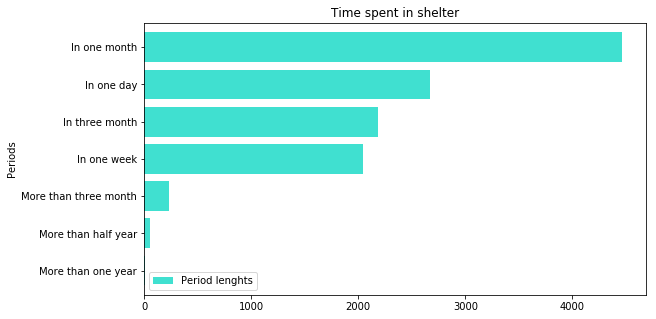

In [58]:
df_period = df_period.set_index(df_period['Periods'], drop=True, append=False, inplace=False, verify_integrity=False)
df_period = df_period.sort_values(by='Period lenghts', ascending=True) 
df_period.plot(kind='barh',width=0.8,rot=0, figsize=(9, 5), color='turquoise')
plt.title('Time spent in shelter')

As we can see, most animals spent arond one week to one month in the shleter. The least frequent for these animals is getting adopetd after a year of listing. Amimals that only spend one day in the shelter is also high. 

__Health conditions and outcomes__

Text(0.5,1,'Health condition distribution')

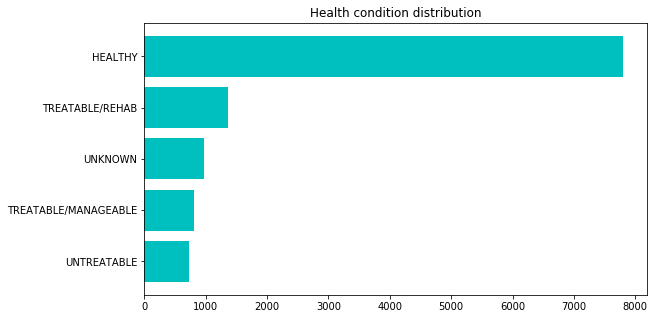

In [59]:
animal_health = df['Intake Condition'].value_counts().sort_values() 
animal_health.plot(kind='barh',width=0.8,rot=0,figsize=(9, 5), color='c')
plt.title('Health condition distribution')

In [60]:
df = df[df['Intake Condition'] != 'UNKNOWN']

In [61]:
animal_health = df[['Outcome Type', 'Intake Condition']].groupby(['Intake Condition', 'Outcome Type']).size().unstack()
h_total = pd.DataFrame(df['Intake Condition'].value_counts())
h_percent = animal_health.join(h_total, how='outer')
h_percent.reset_index(level=0, inplace=True)
h_percent.columns = ['H', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER',
       'Total']
h_total = pd.DataFrame(df['Intake Condition'].value_counts())
h_percent = animal_health.join(h_total, how='outer')

Text(0.5,1,'Outcomes distribution by health condition')

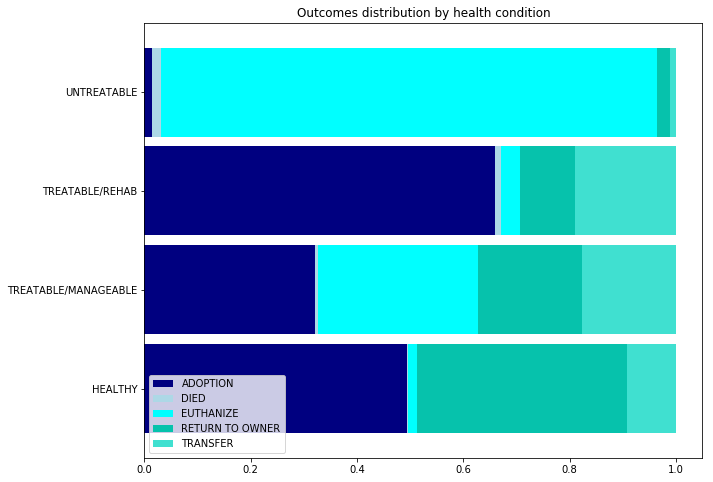

In [62]:
HEALTHY = h_percent.iloc[:1,:6].div(7797)
TREATABLE_MANAGEABLE = h_percent.iloc[1:2,:6].div(804)
TREATABLE_REHAB	 = h_percent.iloc[2:3,:6].div(1364)
UNTREATABLE = h_percent.iloc[3:4,:6].div(724)
h_frames = [HEALTHY, TREATABLE_MANAGEABLE, TREATABLE_REHAB, UNTREATABLE]
h_percentages = pd.concat(h_frames, axis=0)
h_percentages = h_percentages.drop(axis=0, columns=['Intake Condition'])
h_percentages.plot(kind='barh', stacked=True,  width=0.9,rot=0,color=['navy','lightblue','aqua','xkcd:turquoise','turquoise'], figsize=(10, 8))
plt.title('Outcomes distribution by health condition')

As we can see, most of the healty animals end up adopted or returned to the owner and only a small percentage of them died or got euthanized. In the case of threatable animals without the option of rehab the rate of the euthanization is a lot higher, around the same as the rate of the adoption.

In [63]:
df = df[df['Intake Condition'] != 'UNTREATABLE']

__Age__

In [64]:
df['Intake Date'] = pd.to_datetime(df['Intake Date'])
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])
df['Outcome Date'] = pd.to_datetime(df['Outcome Date'])

In [65]:
intake_dates = list(df['Intake Date'])
birth_dates = list(df['Date Of Birth'])
print(intake_dates[1])
print(birth_dates[1])
(intake_dates[1] - birth_dates[1]).days

2017-12-22 00:00:00
2017-10-13 00:00:00


70

In [66]:
age_tuple = zip(df['Intake Date'], df['Date Of Birth'])

ages = [(i - b).days for i, b in age_tuple]
df["Age"] = ages

In [67]:
df_age = df[df.Age > 0]

In [68]:
df_age['Periods in shelter'].unique()

array(['in one day', 'in one month', 'in three month',
       'more_than_half_year', 'in one week', 'more_than_three_month',
       'more_than_a_year'], dtype=object)

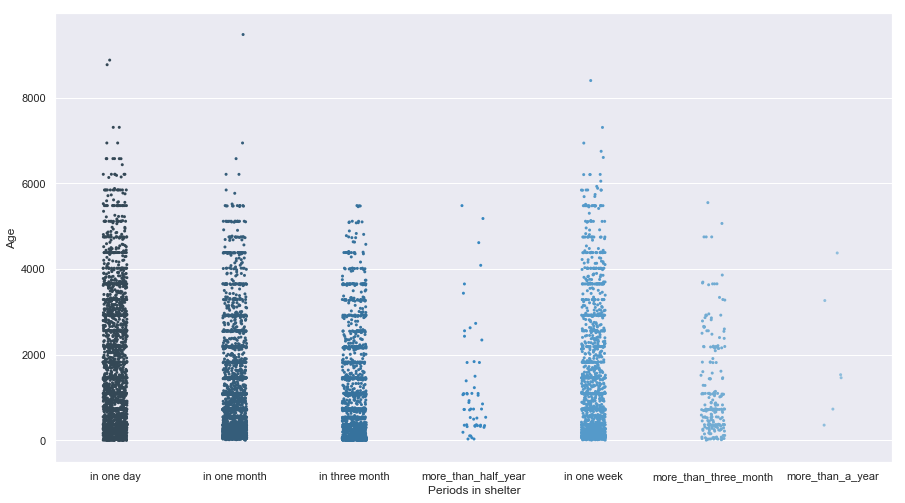

In [69]:
sns.set(rc={'figure.figsize':(15,8.27)})
ax = sns.stripplot(x="Periods in shelter", y="Age", data=df_age, size=3, palette='Blues_d')

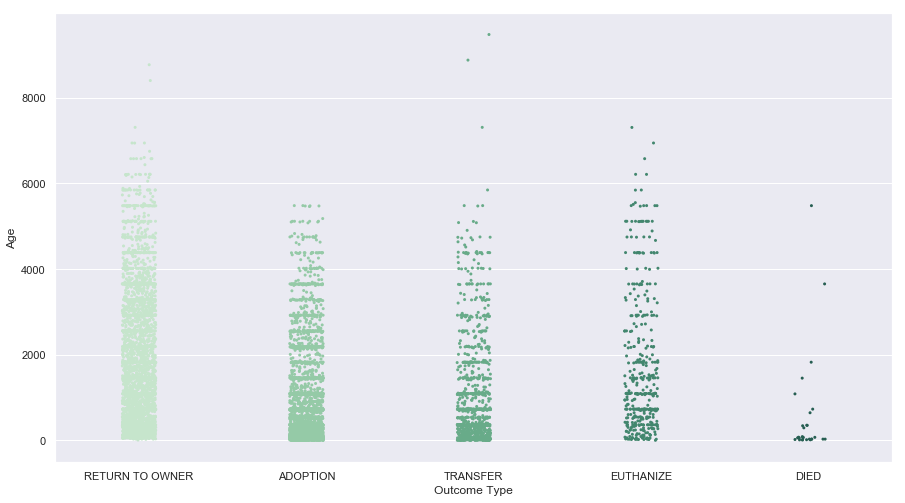

In [70]:
import seaborn as sns

ax = sns.stripplot(x="Outcome Type", y="Age", data=df_age, size=3, palette='ch:2.5,-.2,dark=.3')

__Progress report__

- Approach to exploratory data analysis

_Initial results:
I eximaned the important features as part of the EDA and reported the findings along the way._

- Next steps

_Most importantly the EDA informs us about the important/potential features. It also very usefull in determinting the aims of the classificaton._


1. _Putting together the final table of the features._
2. _Fitting a RandomForset model to predict the outcomes, fitting Decesion Tree model for comparision._
3. _Looking at more modelling options to decide for other models to establish.Optionally attempt to predict the speed of adaption._

__Dealing with dates__

In [71]:
# days as a feature
outcome_date = df['Outcome Date']
df['Outcome day'] = outcome_date.dt.dayofweek

outcome_date = df['Intake Date']
df['Intake day'] = outcome_date.dt.dayofweek

print(df.shape)

(9965, 23)


In [72]:
#seasons as a feature
df['Outcome month'] = outcome_date.dt.month
df['Intake month'] = outcome_date.dt.month

def outcome_to_season(row):
    if row['Outcome month'] in [1,2,12]:
        return 'winter'
    if row['Outcome month'] in [3,4,5]:
        return 'spring'
    if row['Outcome month'] in [6,7,8]:
        return 'summer'
    if row['Outcome month'] in [9,10,11]:
        return 'autumn'

def intake_to_season(row):
    if row['Intake month'] in [1,2,12]:
        return 'winter'
    if row['Intake month'] in [3,4,5]:
        return 'spring'
    if row['Intake month'] in [6,7,8]:
        return 'summer'
    if row['Intake month'] in [9,10,11]:
        return 'autumn'

df['Outcome season'] = df.apply(outcome_to_season, axis=1)
df['Intake season'] = df.apply(intake_to_season, axis=1)

In [73]:
dataset = df.drop(axis=0, columns=['Breed', 'Date Of Birth', 'Days in Shelter', 'Outcome Condition', 'Periods in shelter'])

dataset['Outcome Type'].value_counts()

print(dataset.shape)

(9965, 22)


In [74]:
features = dataset.drop(['Color','Breeds','Outcome Type','Outcome month', 'Intake month', 'Outcome Date', 'Intake Date', 'Outcome Subtype'], axis=1)
print(features.columns)
df_dum = pd.get_dummies(features, drop_first=True)
df_dum.head(2)

Index(['Type', 'Sex', 'Size', 'Intake Type', 'Intake Subtype',
       'Intake Condition', 'Name_given', 'Breed type', 'Simple color', 'Age',
       'Outcome day', 'Intake day', 'Outcome season', 'Intake season'],
      dtype='object')


,Age,Outcome day,Intake day,Type_DOG,Type_OTHER,Sex_Male,Sex_Neutered,Sex_Spayed,Size_LARGE,Size_MED,...,Simple color_Y BRINDLE,Simple color_Y BRINDLE mixed color,Simple color_YELLOW,Simple color_YELLOW mixed color,Outcome season_spring,Outcome season_summer,Outcome season_winter,Intake season_spring,Intake season_summer,Intake season_winter
1,3054,5,4,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,70,2,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


### Modeling

- Importing the necessary packages

In [75]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

__Predictor and predicted variables__

In [76]:
#Creating the dependent variable class
factor = pd.factorize(dataset['Outcome Type'])
dataset['Outcome Type'] = factor[0]
definitions = factor[1]
print(dataset['Outcome Type'].head())
print(definitions)

1    0
2    1
3    1
4    0
5    1
Name: Outcome Type, dtype: int64
Index(['RETURN TO OWNER', 'ADOPTION', 'TRANSFER', 'EUTHANIZE', 'DIED'], dtype='object')


In [77]:
y = dataset['Outcome Type']

In [78]:
#the baseline accuracy:
dataset['Outcome Type'].value_counts().max()/len(dataset)

0.5029603612644254

In [79]:
X = df_dum
print(X.shape)

(9965, 265)


__Splitting dataset to train and test__

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

__Standardizing predictor matrices__

In [81]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

/Users/klara/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/klara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/klara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


__PCA__

In [82]:
#PCA
from sklearn.decomposition import PCA

In [83]:
# pca = PCA(n_components=100)  
# X_train = pca.fit_transform(X_train_ss)  
# X_test = pca.transform(X_test_ss)  

In [84]:
# explained_variance = pca.explained_variance_ratio_
# explained_variance

__Logistic Regression__

In [85]:
model = LogisticRegression(penalty='l2', solver='newton-cg', multi_class='multinomial') 
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
model.score(X_test,y_test)

0.7622073578595318

In [86]:
# create a default Logistic Regression model and find its mean cross-validated accuracy with your training data
# use 5 cross-validation folds
lr = LogisticRegression(solver='newton-cg', multi_class='multinomial')
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.7615832939591288

In [87]:
cross_val_score(lr, X_test, y_test, cv=5).mean()

0.7398554067878542

In [88]:
predictions = cross_val_predict(lr, X_test, y_test, cv=5)

In [89]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
lr.score(X_test, y_test)

0.7622073578595318

In [91]:
confusion = confusion_matrix(y_test, predictions)
pd.DataFrame(confusion, columns=sorted(y_train.unique()), index=sorted(y_train.unique()))

,0,1,2,3,4
0,764,172,44,19,0
1,160,1289,42,15,1
2,78,127,123,21,1
3,20,42,28,36,1
4,2,1,2,2,0


In [92]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       999
           1       0.80      0.86      0.83      1507
           2       0.59      0.35      0.44       350
           3       0.55      0.36      0.44       127
           4       0.00      0.00      0.00         7

   micro avg       0.76      0.76      0.76      2990
   macro avg       0.54      0.48      0.50      2990
weighted avg       0.75      0.76      0.75      2990



_Of the entire test set, 75% of the predicted outcome were the real outcome according to the given test data._

In [93]:
log_reg = LogisticRegressionCV(cv=None, solver='liblinear')

- Using Gridsearch on the train data then test it on the test data

In [94]:
# create a hyperparameter dictionary for a logistic regression
gs_params={'penalty':['l1','l2'],
                 'Cs':[np.logspace(-3,0,50)]}

In [95]:
# create a gridsearch object using LogisticRegressionCV() and the dictionary you created above
gs=GridSearchCV(log_reg, gs_params,cv=5, verbose=1, n_jobs=-1)

In [96]:
# fit the gridsearch object on your training data
gs.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  5.6min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.9min finished
/Users/klara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/klara/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'Cs': [array([0.001  , 0.00115, 0.00133, 0.00153, 0.00176, 0.00202, 0.00233,
       0.00268, 0.00309, 0.00356, 0.00409, 0.00471, 0.00543, 0.00625,
       0.0072 , 0.00829, 0.00954, 0.01099, 0.01265, 0.01456, 0.01677,
       0.01931, 0.02223, 0.0256 , 0.02947, 0.0...8, 0.32375,
       0.37276, 0.42919, 0.49417, 0.56899, 0.65513, 0.75431, 0.86851,
       1.     ])]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [97]:
# print out the best parameters
gs.best_params_

{'Cs': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
        0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
        0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
        0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
        0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
        0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
        0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
        0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
        0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
        0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ]),
 'penalty': 'l1'}

In [98]:
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test,y_test))

Best estimator mean cross validated training score:
0.7650179211469534
Best estimator score on the full training set:
0.7805017921146954
Best estimator score on the test set:
0.7648829431438127


In [99]:
# assign the best estimator to a variable:
best_lr = gs.best_estimator_

_A little better score on the test data after the Grid-search_

In [100]:
# score your best estimator on the testing data:
best_lr.score(X_test, y_test)

0.7648829431438127

In [101]:
# create a dataframe to look at the coefficients
coef_df = pd.DataFrame({'coefficients': best_lr.coef_[0],
                        'feature': X.columns,})

coef_df.head(10)

,coefficients,feature
0,0.915727,Age
1,-0.176571,Outcome day
2,0.072955,Intake day
3,0.458221,Type_DOG
4,-0.184111,Type_OTHER
5,0.169960,Sex_Male
6,-0.605117,Sex_Neutered
7,-0.617690,Sex_Spayed
8,0.332292,Size_LARGE
9,0.302138,Size_MED


_Most important feture is the age and the dog animal type. Interesting that our model shows the Neatured and Spayed animals as negative coefficients._ 

In [102]:
sns.reset_orig()

In [103]:
probabilities = best_lr.predict_proba(X)
cmap = ListedColormap(sns.color_palette("CMRmap"))

/Users/klara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


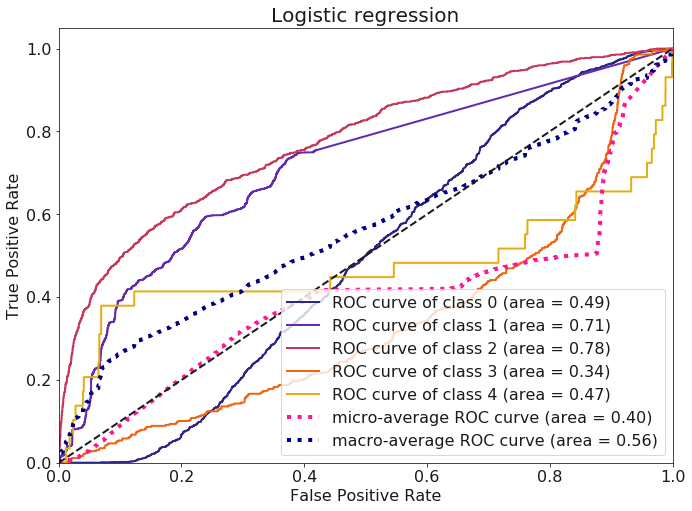

In [104]:
skplt.metrics.plot_roc(y, probabilities, title='Logistic regression', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

_Seemingly the Logistic regression model evaluates poorly the animal outcomes.Best evaluating the Adoption as an outcome_

- The macro average takes the mean of these three precision scores.

- The micro average sums all true positives and divides by the sum of all true positive and false positives

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

__Decision tree__

In [105]:

# Setting the trees
# max_depth: the maximum number of hierarchical decision nodes (how "deep" the tree is built)
classifier1 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3)
classifier2 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=10)
classifier3 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=13)
classifier4 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=15)
classifier5 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None)
# fit 4 trees
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)
classifier4.fit(X_train, y_train)
classifier5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
print('Scores on the train data: with Maximum depth as follows: 3, 10, 13, 15, None') 
print(classifier1.score(X_train, y_train))
print(classifier2.score(X_train, y_train))
print(classifier3.score(X_train, y_train))
print(classifier4.score(X_train, y_train))
print(classifier5.score(X_train, y_train))

Scores on the train data: with Maximum depth as follows: 3, 10, 13, 15, None
0.7141218637992831
0.8213620071684588
0.8807168458781361
0.9188530465949821
0.9997132616487455


_It can be seen how achieving completely pure leaves creates overfitting as `max__depth = None` is the worst performing model._

In [107]:
print('Score on the test data:with Maximum depth as follows: 3, 10, 13, 15, None')
print(classifier1.score(X_test, y_test))
print(classifier2.score(X_test, y_test))
print(classifier3.score(X_test, y_test))
print(classifier4.score(X_test, y_test))
print(classifier5.score(X_test, y_test))

Score on the test data:with Maximum depth as follows: 3, 10, 13, 15, None
0.7160535117056857
0.7431438127090301
0.728428093645485
0.7334448160535118
0.702675585284281


_The best score on the test set can be seen with the `max__depth = 8` ._

- Using Cross validation

In [108]:
print('Cross-validated score on the train data: with Maximum depth as follows: 3, 10, 13, 15, None') 
print(cross_val_score(classifier1, X_train, y_train, cv=6).mean())
print(cross_val_score(classifier2, X_train, y_train, cv=6).mean())
print(cross_val_score(classifier3, X_train, y_train, cv=6).mean())
print(cross_val_score(classifier4, X_train, y_train, cv=6).mean())
print(cross_val_score(classifier5, X_train, y_train, cv=6).mean())

Cross-validated score on the train data: with Maximum depth as follows: 3, 10, 13, 15, None
0.7132624669734277
0.739791299313155
0.7407916184778198
0.7254566911495178
0.6999365577652301


In [109]:
print('Cross-validated score on the test data: with Maximum depth as follows: 3, 10, 13, 15, None') 
print(cross_val_score(classifier1, X_test, y_test, cv=6).mean())
print(cross_val_score(classifier2, X_test, y_test, cv=6).mean())
print(cross_val_score(classifier3, X_test, y_test, cv=6).mean())
print(cross_val_score(classifier4, X_test, y_test, cv=6).mean())
print(cross_val_score(classifier5, X_test, y_test, cv=6).mean())

Cross-validated score on the test data: with Maximum depth as follows: 3, 10, 13, 15, None
0.704342912942533
0.7180986528520082
0.7073742962484116
0.7047208722028128
0.6833171250904959


- Feature importances according to the different maximum depth of the trees

In [110]:
print('Maximum depth = 3')
pd.DataFrame(list(zip(X.columns,classifier1.feature_importances_)),columns=
             ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = 3


,Feature,Importance
3,Type_DOG,0.321513
42,Name_given_name not given,0.215146
0,Age,0.166448
5,Sex_Male,0.132695
15,Intake Type_OWNER SURRENDER,0.085289
4,Type_OTHER,0.043161
19,Intake Subtype_COMM CAT,0.035749
178,Simple color_BLUE CREAM mixed color,0.000000
182,Simple color_BLUE PT mixed color,0.000000
181,Simple color_BLUE PT,0.000000


In [111]:
print('Maximum depth = 10')
pd.DataFrame(list(zip(X.columns,classifier2.feature_importances_)),columns=
             ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = 10


,Feature,Importance
0,Age,0.183723
3,Type_DOG,0.169913
42,Name_given_name not given,0.163331
5,Sex_Male,0.078383
15,Intake Type_OWNER SURRENDER,0.057645
1,Outcome day,0.038330
40,Intake Condition_TREATABLE/MANAGEABLE,0.034891
30,Intake Subtype_OVER THE COUNTER,0.024215
4,Type_OTHER,0.023521
6,Sex_Neutered,0.020240


In [112]:
print('Maximum depth = 13')
pd.DataFrame(list(zip(X.columns,classifier3.feature_importances_)),columns=
             ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = 13


,Feature,Importance
0,Age,0.195268
3,Type_DOG,0.138724
42,Name_given_name not given,0.133350
5,Sex_Male,0.065000
15,Intake Type_OWNER SURRENDER,0.048181
1,Outcome day,0.039591
40,Intake Condition_TREATABLE/MANAGEABLE,0.033143
2,Intake day,0.026147
30,Intake Subtype_OVER THE COUNTER,0.022249
4,Type_OTHER,0.019692


In [113]:
print('Maximum depth = 15')
pd.DataFrame(list(zip(X.columns,classifier4.feature_importances_)),columns=
             ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = 15


,Feature,Importance
0,Age,0.191658
3,Type_DOG,0.123468
42,Name_given_name not given,0.118685
5,Sex_Male,0.058374
1,Outcome day,0.047947
15,Intake Type_OWNER SURRENDER,0.045153
2,Intake day,0.033168
40,Intake Condition_TREATABLE/MANAGEABLE,0.030932
30,Intake Subtype_OVER THE COUNTER,0.023086
6,Sex_Neutered,0.017988


In [114]:
print('Maximum depth = None')
pd.DataFrame(list(zip(X.columns,classifier5.feature_importances_)),columns=
                   ['Feature','Importance']).sort_values(by='Importance',ascending=False).head(10)

Maximum depth = None


,Feature,Importance
0,Age,0.195046
3,Type_DOG,0.099086
42,Name_given_name not given,0.095248
1,Outcome day,0.055686
5,Sex_Male,0.049066
2,Intake day,0.040264
15,Intake Type_OWNER SURRENDER,0.035385
40,Intake Condition_TREATABLE/MANAGEABLE,0.025257
6,Sex_Neutered,0.023001
30,Intake Subtype_OVER THE COUNTER,0.019955


_The trees with the different max_depht, if a tree cut early some features might have higher influence on the outcomes._

In [115]:
# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix

def plot_dt(classifier3, feature_names=None):
    print('Max depth:', classifier3.max_depth)
    dot_data = StringIO() 
    export_graphviz(classifier1, 
                    out_file=dot_data,  
                    filled=True, 
                    rounded=True,
                    special_characters=True,
                    feature_names=feature_names
                   )  

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    return Image(graph.create_png())  

Max depth: 13


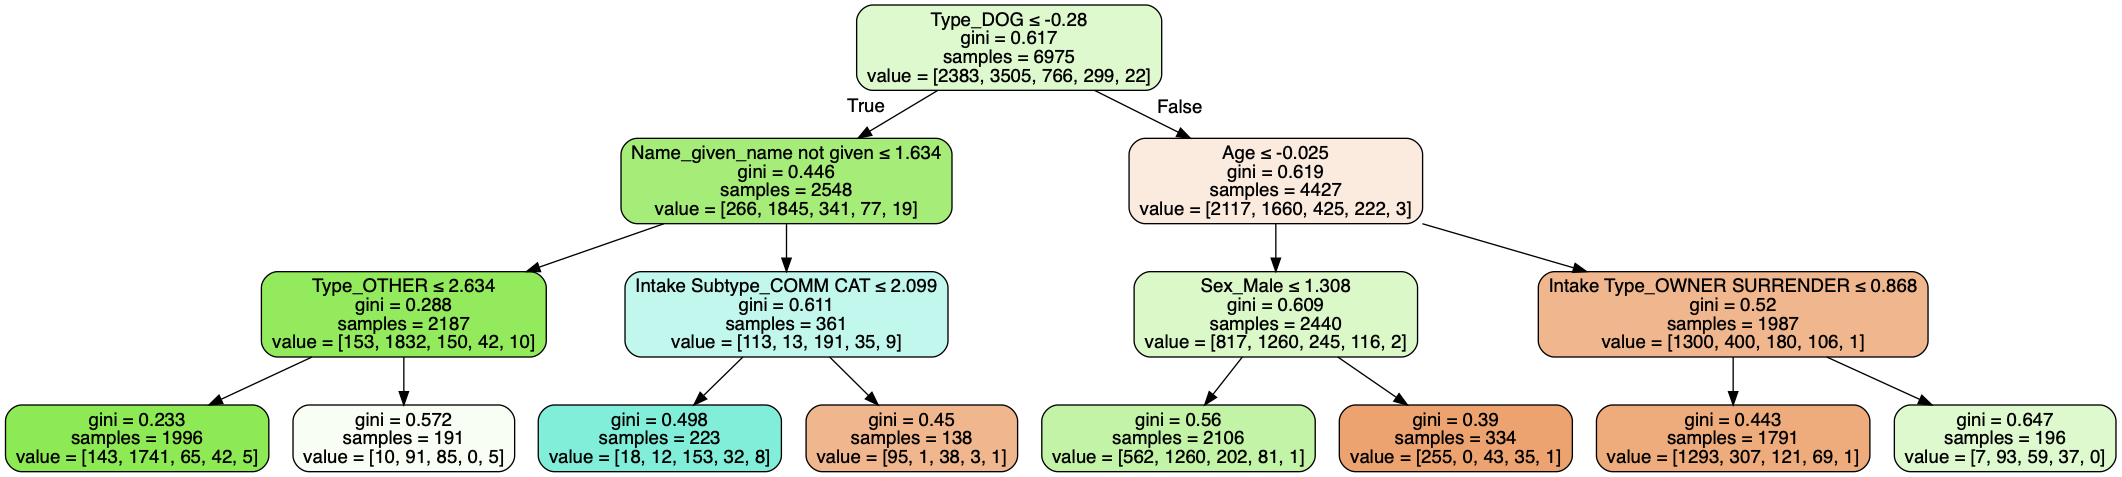

In [116]:
plot_dt(classifier3, feature_names=X.columns)

In [117]:
# gridsearch params
dtc_params = {
    'max_depth':[None]+list(range(1,10)),
    'max_features':range(1,X.shape[1]+1),
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
model = DecisionTreeClassifier()
dtc_gs = GridSearchCV(model, dtc_params, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

In [118]:
# use the gridearch model to fit the data
dtc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 29150 candidates, totalling 145750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 2412 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 4812 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6312 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8012 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 9912 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 12012 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 14312 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 16812 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 19512 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 22412 tasks  

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_features': range(1, 266), 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [119]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 8, 'max_features': 176, 'min_samples_split': 2}
0.7554121863799284


In [120]:
model = dtc_gs.best_estimator_
print(dtc_gs.best_estimator_)
print('R2 training: ', dtc_gs.score(X_train, y_train))
print('R2 test: ', dtc_gs.score(X_test, y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=176, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
R2 training:  0.7734767025089606
R2 test:  0.7341137123745819


In [121]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi.head(10)

,feature,importance
0,Age,0.234313
42,Name_given_name not given,0.184104
95,Breed type_DOMESTIC SH,0.133928
5,Sex_Male,0.094856
30,Intake Subtype_OVER THE COUNTER,0.062430
15,Intake Type_OWNER SURRENDER,0.045898
40,Intake Condition_TREATABLE/MANAGEABLE,0.038227
11,Size_SMALL,0.029582
4,Type_OTHER,0.026364
19,Intake Subtype_COMM CAT,0.022219


_The features importance ranking is based on an importance measure ranging from 0 to 1, with 1 being the most important. The importance scores of all features add up to 1.
A feature with higher feature importance reduced the criterion (impurity) more than the other features._

_Below, show the feature importances for most important variables sorted by most important feature to least._

In [122]:
probabilities = dtc_best.predict_proba(X_test)
cmap = ListedColormap(sns.color_palette("husl",3))

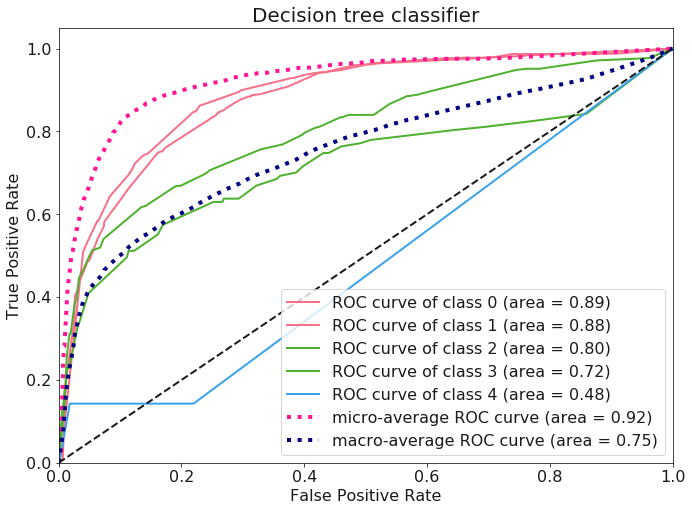

In [123]:
skplt.metrics.plot_roc(y_test, probabilities, title='Decision tree classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

_The Decision tree model far exceeds the performance of Logistic regression model._
_Evaluating the Euthanise and Adoption quite well._

__Random Forest__

In [124]:
from sklearn.ensemble import RandomForestClassifier

_Next, using the training dataset (both dependent and independent to train the random forest)_

In [125]:
# Fitting Random Forest Classification to the Training set
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 2)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

_Score on the train set_

In [126]:
print(rf_classifier.score(X_train, y_train))

0.988673835125448


_Score on the test set_

In [127]:
rf_classifier.score(X_test, y_test)

0.748494983277592

In [128]:
probabilities = rf_classifier.predict_proba(X_test)
cmap = ListedColormap(sns.color_palette("husl",3))

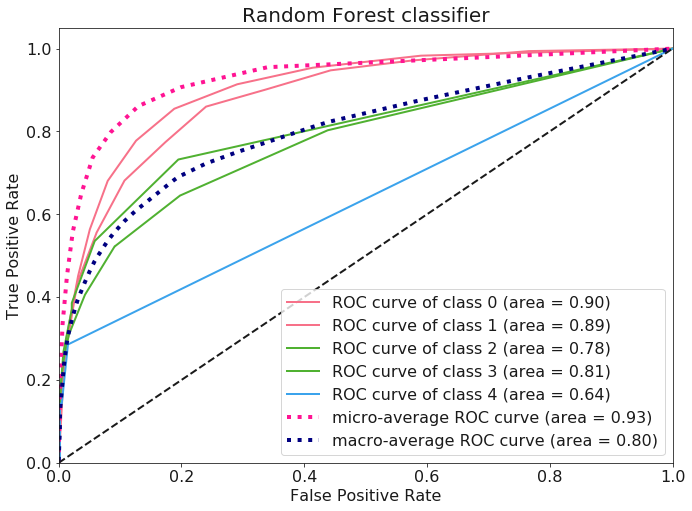

In [129]:
skplt.metrics.plot_roc(y_test, probabilities, title='Random Forest classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

_The Random Forest model has a similar performance. Best evaluating the Euthanise as outcome, and worst evaluating Death._
_

In [130]:
importances = pd.DataFrame(list(zip(classifier3.feature_importances_, rf_classifier.feature_importances_,)),
                           index=X.columns, columns=['Decision tree importance', 'Random forest importance']).sort_values('Random forest importance', 
                            ascending=False).head(10)
importances

,Decision tree importance,Random forest importance
Age,0.195268,0.133796
Outcome day,0.039591,0.061879
Intake day,0.026147,0.053832
Name_given_name not given,0.133350,0.047881
Sex_Neutered,0.019424,0.040433
Intake Condition_TREATABLE/MANAGEABLE,0.033143,0.029044
Type_DOG,0.138724,0.028733
Intake Subtype_OVER THE COUNTER,0.022249,0.027706
Sex_Spayed,0.009833,0.026289
Intake Type_OWNER SURRENDER,0.048181,0.025577


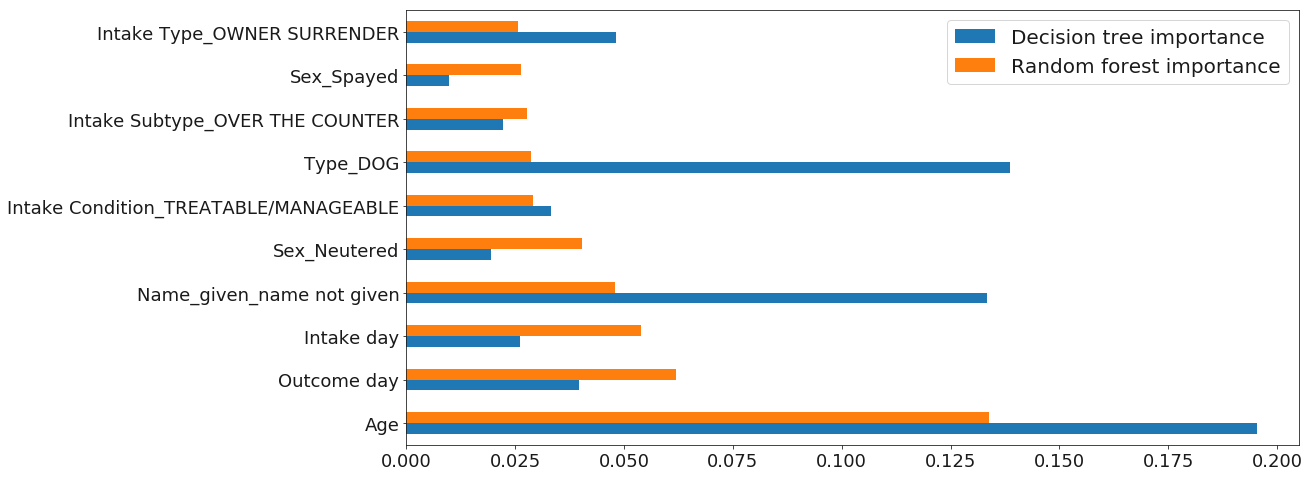

In [131]:
fig, ax = plt.subplots(figsize=(16, 8))
importances.plot(kind='barh', ax=ax, fontsize=18)
plt.legend(fontsize=20)
plt.show()

__Boosting__

_Ada Boost_

In [132]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [133]:
param_grid_abc = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              'n_estimators': [10, 100, 1000]
             }

0.6174910394265233
0.6088848999473234
0.5929765886287626
0.5929765886287626


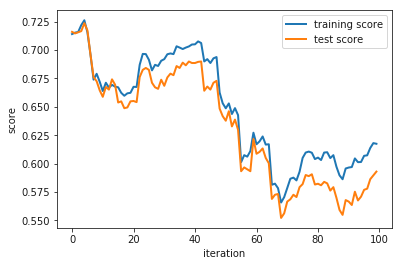

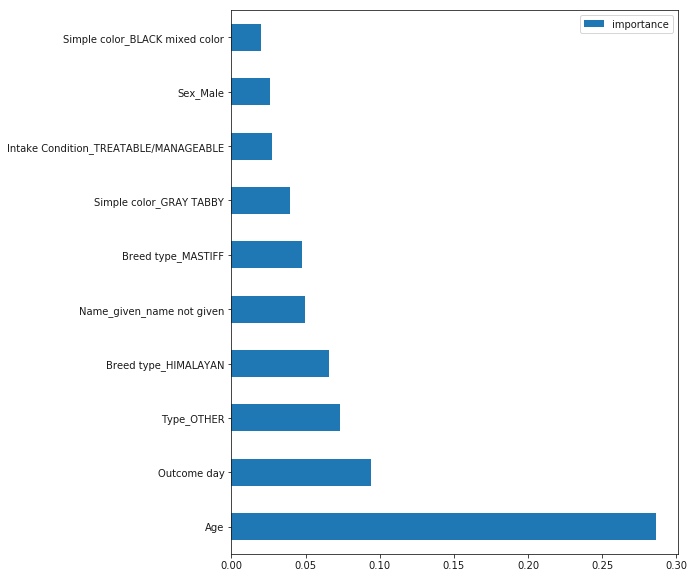

In [134]:
base_estimator = DecisionTreeClassifier(max_depth=3)
classifier_adab = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=1)
classifier_adab.fit(X_train, y_train)

print(classifier_adab.score(X_train,y_train))
print(cross_val_score(classifier_adab, X_train, y_train , cv=5).mean())
print(classifier_adab.score(X_test, y_test))
print(pd.DataFrame(classifier_adab.staged_predict(X_test)).T.apply(lambda x: accuracy_score(y_test, x), axis=0)[classifier_adab.n_estimators-1])

plt.plot(list(classifier_adab.staged_score(X_train, y_train)), label='training score', lw=2)
plt.plot(list(classifier_adab.staged_score(X_test, y_test)), label ='test score', lw=2)
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

pd.DataFrame(classifier_adab.feature_importances_,
             columns=['importance'], 
             index = X.columns
            ).sort_values(by='importance', ascending=False
            ).head(10).plot(kind='barh', figsize=(8,10));

In [135]:
ABC = AdaBoostClassifier(base_estimator = base_estimator)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid_abc)

In [136]:
param_test1 = {'max_depth':range(5,16,2), 'n_estimators':range(400,1501,100)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=400, 
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test1, n_jobs=-1,iid=False, cv=5)

In [137]:
grid_search_ABC.fit(X_train,y_train)

/Users/klara/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
grid_search_ABC.score(X_test,y_test)

0.6267558528428093

_Interesting how the training score has just a little higher performance through the iteration._

In [139]:
probabilities = classifier_adab.predict_proba(X_test)
cmap = ListedColormap(sns.color_palette("husl",3))

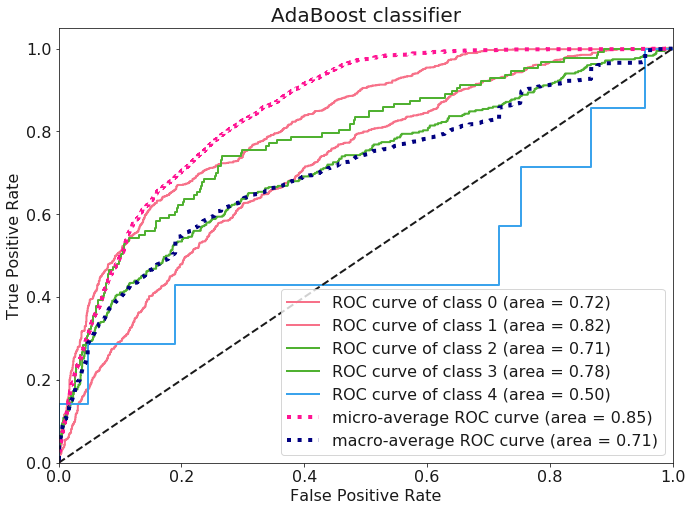

In [140]:
skplt.metrics.plot_roc(y_test, probabilities, title='AdaBoost classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

_Gradient Boosting_

In [141]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, 
                                   criterion='mse',
                                   loss='deviance', 
                                   max_depth=3,
                                   learning_rate=1.0, 
                                   random_state=1)
gb_classifier.fit(X_train, y_train)

print(gb_classifier.score(X_train,y_train))
print(cross_val_score(gb_classifier, X_train, y_train , cv=5).mean())
print(gb_classifier.score(X_test, y_test))

0.8731182795698925
0.7625940733881753
0.7652173913043478


In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
param_test0 = {'n_estimators':range(20,401,10)}

gsearch0 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               min_samples_leaf=50, max_depth=8,
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test0, n_jobs=-1,iid=False, cv=5)

In [144]:
gsearch0.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': range(20, 401, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [145]:
gsearch0.score(X_test,y_test)

0.782608695652174

In [149]:
gsearch0.best_params_

{'n_estimators': 210}

In [174]:
param_test1 = {'max_depth':range(5,16,2)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, 
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test1, n_jobs=-1,iid=False, cv=5)

In [175]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(5, 16, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [176]:
gsearch1.score(X_test,y_test)

0.7799331103678929

In [177]:
gsearch1.best_params_

{'max_depth': 7}

In [178]:
param_test2 = {'min_samples_leaf':range(10,71,10), 'min_samples_split':range(10,100,10)}

gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, 
                                                               max_depth=7,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test2, n_jobs=-1,iid=False, cv=5)

In [179]:
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_leaf': range(10, 71, 10), 'min_samples_split': range(10, 100, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [180]:
gsearch2.score(X_test,y_test)

0.7849498327759198

In [181]:
gsearch2.best_params_

{'min_samples_leaf': 10, 'min_samples_split': 70}

In [182]:
param_test3 = {'min_samples_leaf':range(2,12,2)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               n_estimators=210, 
                                                               min_samples_split= 70, max_depth=7,
                                                     subsample=0.8, random_state=10), 
                        param_grid = param_test3, n_jobs=-1,iid=False, cv=5)

In [183]:
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_leaf': range(2, 12, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
gsearch3.score(X_test,y_test)

0.7953177257525084

In [185]:
gsearch3.best_params_

{'min_samples_leaf': 2}

In [190]:
param_test4 = {'max_features':range(16,24,2)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7,
                                                     subsample=0.8, random_state=10), 
                        param_grid = param_test4, n_jobs=-1,iid=False, cv=5)

In [191]:
gsearch4.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_sampl...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': range(16, 24, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [192]:
gsearch4.score(X_train,y_train)

0.894336917562724

In [193]:
#pd.DataFrame(gsearch4.cv_results_)#['mean_test_score'].hist(bins=30)

In [194]:
gsearch4.score(X_test,y_test)

0.7839464882943143

In [195]:
gsearch4.best_params_

{'max_features': 22}

In [196]:
param_test5 = {'max_features':range(22,32,2)}

gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7,
                                                     subsample=0.8, random_state=10), 
                        param_grid = param_test5, n_jobs=-1,iid=False, cv=5)

In [197]:
gsearch5.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_sampl...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': range(22, 32, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [198]:
gsearch5.score(X_test,y_test)

0.7879598662207358

In [199]:
gsearch5.best_params_

{'max_features': 26}

In [200]:
param_test6 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

gsearch6 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7, max_features=26,
                                                     subsample=0.8, random_state=10),
                        param_grid = param_test6, n_jobs=-1,iid=False, cv=5)

In [201]:
gsearch6.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=26, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [202]:
gsearch6.score(X_test,y_test)

0.7842809364548495

In [203]:
gsearch6.best_params_

{'subsample': 0.85}

Lets decrease the learning rate to half, i.e. 0.05 with twice (420) the number of trees.

In [204]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=420, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7, max_features=26,
                             subsample=0.85, random_state=10)

In [205]:
gbm_tuned_1.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=7,
              max_features=26, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=70,
              min_weight_fraction_leaf=0.0, n_estimators=420,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [206]:
gbm_tuned_1.score(X_test,y_test)

0.7856187290969899

In [207]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=600, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7, max_features=26,
                             subsample=0.85, random_state=10)

In [208]:
gbm_tuned_2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=11,
              max_features=38, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=22, min_samples_split=80,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [209]:
gbm_tuned_2.score(X_test,y_test)

0.7936454849498328

In [229]:
gbm_tuned_2.score(X_train,y_train)

0.9204301075268817

In [234]:
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.03, n_estimators=1100, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7, max_features=26,
                             subsample=0.85, random_state=10)

In [235]:
gbm_tuned_3.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=7,
              max_features=26, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=70,
              min_weight_fraction_leaf=0.0, n_estimators=1100,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [236]:
gbm_tuned_3.score(X_test,y_test)

0.7916387959866221

In [237]:
gbm_tuned_3.score(X_train,y_train)

0.9359139784946237

95    0.767224
96    0.766555
97    0.765886
98    0.765552
99    0.765217
dtype: float64


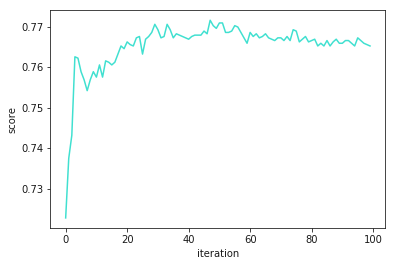

In [239]:
scores = pd.DataFrame(gb_classifier.staged_predict(X_test)).T.apply(lambda x: accuracy_score(y_test, x), axis=0)
print(scores.tail())
scores.plot(color='turquoise')
plt.xlabel('iteration')
plt.ylabel('score');

595    0.793645
596    0.793980
597    0.792977
598    0.793645
599    0.793645
dtype: float64


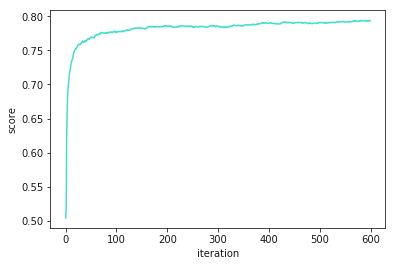

In [240]:
scores = pd.DataFrame(gbm_tuned_2.staged_predict(X_test)).T.apply(lambda x: accuracy_score(y_test, x), axis=0)
print(scores.tail())
scores.plot(color='turquoise')
plt.xlabel('iteration')
plt.ylabel('score');

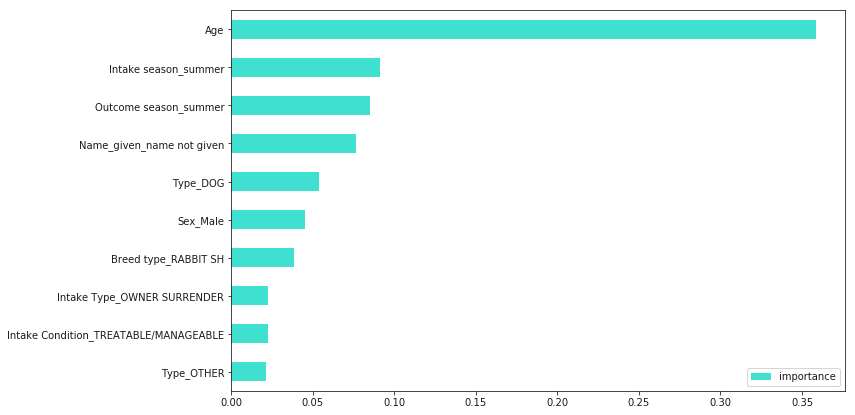

In [241]:
pd.DataFrame(gb_classifier.feature_importances_,
             columns=['importance'], 
             index = X.columns
            ).sort_values(by='importance', ascending=True
            ).tail(10).plot(kind='barh', figsize=(11, 7), color='turquoise');

In [242]:
probabilities = gbm_tuned_2.predict_proba(X_test)
cmap = ListedColormap(sns.color_palette("husl",3))

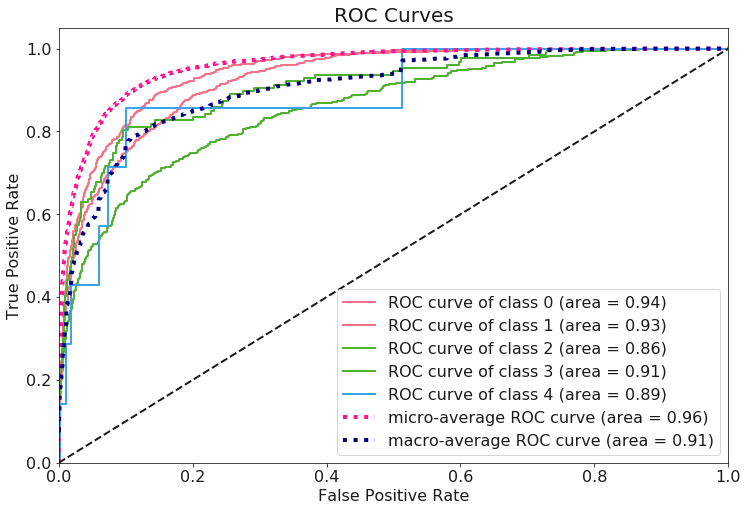

In [243]:
skplt.metrics.plot_roc(y_test, probabilities, plot_micro=True, plot_macro=True,
                       title_fontsize=20, text_fontsize=16, figsize=(12,8), cmap=cmap)

plt.show()

_Both the Adaboost and Gradient Boosting method reached a similar and quite good score, but little lower the in the case of using Random forest or Decesion tree for the evaluation. Both boosting algorithm evaluates well the Euthanise, Adoption and Return to owner outcomes_ 

__Summary of the feature importances__

In [246]:
importances_sum = pd.DataFrame(list(zip( classifier3.feature_importances_, rf_classifier.feature_importances_, 
                                    gb_classifier.feature_importances_, classifier_adab.feature_importances_)),
                           index=X.columns, columns=['Decision tree importance', 'Random forest importance', 
                                                     'Gradient boosting importance',
                                                     'AdaBoost importance']).sort_values('Gradient boosting importance', 
                            ascending=True).tail(20)
importances_sum

,Decision tree importance,Random forest importance,Gradient boosting importance,AdaBoost importance
Size_X-LRG,0.000488,0.001157,0.005293,0.000000
Intake Subtype_COMM CAT,0.016267,0.004767,0.005860,0.001884
Intake Condition_TREATABLE/REHAB,0.010342,0.018596,0.006879,0.008090
Intake day,0.026147,0.053832,0.007759,0.008896
Sex_Spayed,0.009833,0.026289,0.008458,0.007069
Simple color_BROWN,0.003528,0.005171,0.008644,0.000000
Simple color_BROWN mixed color,0.003681,0.008622,0.010470,0.005526
Simple color_FAWN mixed color,0.001079,0.001346,0.013684,0.000000
Intake Subtype_OVER THE COUNTER,0.022249,0.027706,0.015918,0.008541
Outcome day,0.039591,0.061879,0.016307,0.094281


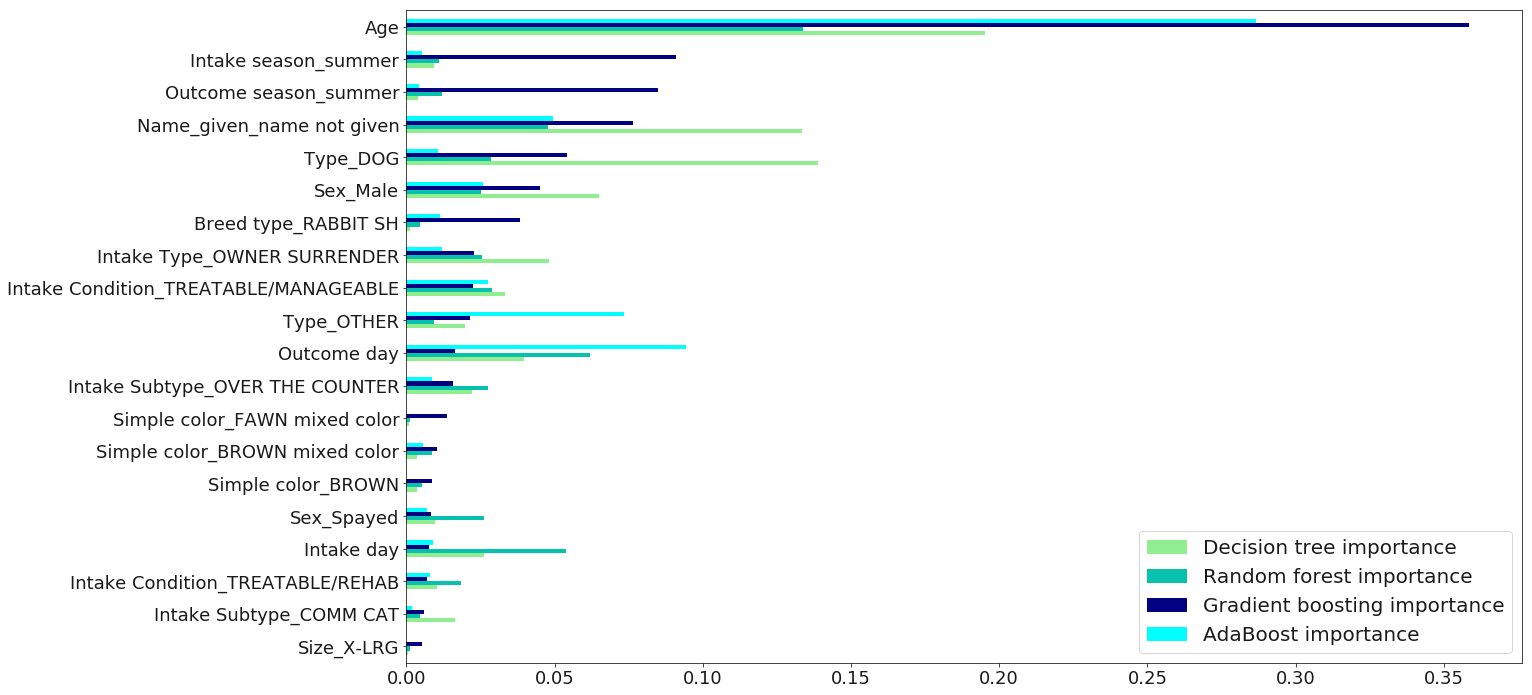

In [247]:
fig, ax = plt.subplots(figsize=(20, 12))
importances_sum.plot(kind='barh', ax=ax, fontsize=18,  color=['lightgreen', 'xkcd:turquoise','navy','aqua','turquoise', 'azure'])
plt.legend(fontsize=20)
plt.show()

__Use of the model in real world situation__

- How could you continue to validate your model's performance over time?

_For the continued valuation of the performance of the best model, the incrase of the dataset is inevitable. By recording how the model performs on new data is also a good method for the constant evuluation._

- What steps might you need to take to productionize your model for an enterprise environment?

The use of the model should be user friendly, so the different shelters can use it easily, I could imagine a Flask application for this purpose.

- How would you deploy your model publicly? What could you do to setup your model and share it online right now?

As I mentioned before I would set up a web page with the help of Flask. To deploy the model publicity I would start with writng a blog post for example on Medium. For second step I would consider to use Reddit or Twitter for sharing the content of my blogpost.

__Questions?__


__Ideas__